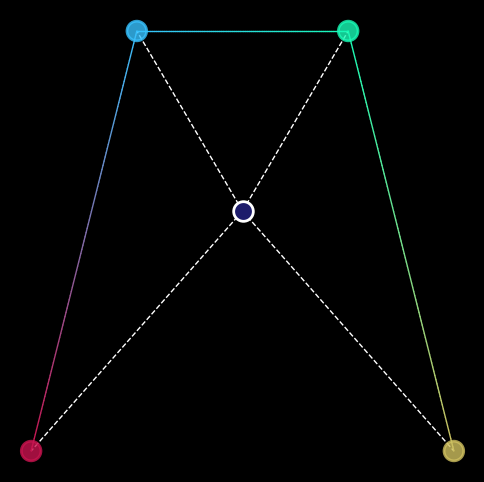

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
from matplotlib.animation import FuncAnimation

# Definir as coordenadas dos vértices do trapézio isósceles
x = [-4, -2, 2, 4]  # Coordenadas x dos vértices
y = [-4, 3, 3, -4]  # Coordenadas y dos vértices

# Origem
O = [0,0]

# Pontos P0, P1, P2, P3
P = np.array([[-4, -4], [-2, 3], [2, 3], [4, -4]])

# Definir as cores de cada vértice
colors = ['#c9144f', '#38c2ff', '#18fbb6', '#d0c060']

# Configurar o gráfico
fig, ax = plt.subplots(figsize=(6, 6), dpi=100)
ax.set_facecolor('black')  # Cor de fundo preto
fig.set_facecolor('black')  # Cor de fundo preto
ax.grid(color='white', linewidth=0.5, alpha=0.3)  # Grid branco

ax.set_axis_off()

# Função para interpolar cores entre dois vértices
def lerp(c1, c2, t):
    return np.array(c1) * (1 - t) + np.array(c2) * t

# Número de divisões em cada segmento (para suavizar o gradiente)
divisions = 100

# Plotar segmentos de reta com gradiente e bordas arredondadas
for i in range(len(P) - 1):
    c1 = to_rgba(colors[i])  # Cor do vértice inicial
    c2 = to_rgba(colors[i+1])  # Cor do vértice final
    
    # Interpolar ao longo do segmento de reta
    for j in range(divisions):
        t = j / divisions
        x_start = P[i, 0] * (1 - t) + P[i+1, 0] * t
        y_start = P[i, 1] * (1 - t) + P[i+1, 1] * t
        x_end = P[i, 0] * (1 - (t + 1/divisions)) + P[i+1, 0] * (t + 1/divisions)
        y_end = P[i, 1] * (1 - (t + 1/divisions)) + P[i+1, 1] * (t + 1/divisions)
        
        # Cor interpolada
        interpolated_color = lerp(c1, c2, t)
        
        # Plotar o segmento de reta com bordas arredondadas
        ax.plot([x_start, x_end], [y_start, y_end], color=interpolated_color, lw=1, solid_capstyle='round')

# Plotar os vértices do trapézio
ax.scatter(x, y, facecolors=colors, edgecolors=colors, linewidths=2, alpha=0.8, s=200)  # Cores dos pontos

ax.scatter(O[0], O[1], facecolors='#1d1c6b', edgecolors='white', linewidths=2, s=200)

ax.plot([O[0], P[0,0]], [O[1], P[0,1]], color="white", lw=1, solid_capstyle='round', linestyle="--", zorder=0)
ax.plot([O[0], P[1,0]], [O[1], P[1,1]], color="white", lw=1, solid_capstyle='round', linestyle="--", zorder=0)
ax.plot([O[0], P[2,0]], [O[1], P[2,1]], color="white", lw=1, solid_capstyle='round', linestyle="--", zorder=0)
ax.plot([O[0], P[3,0]], [O[1], P[3,1]], color="white", lw=1, solid_capstyle='round', linestyle="--", zorder=0)

plt.show()